414
(414, 384) (414, 6)
data shape (207, 6) (207, 384)


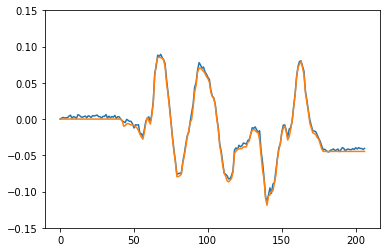

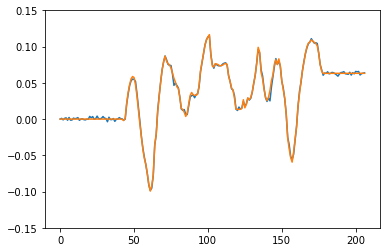

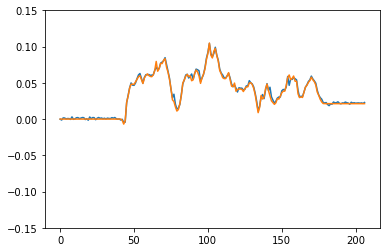

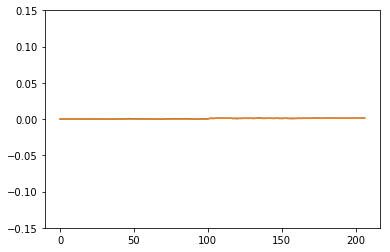

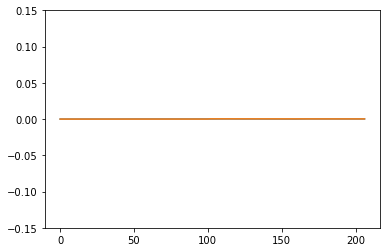

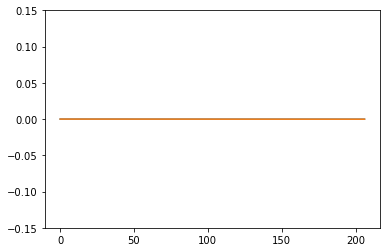

In [39]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np

def same_size(X,y):
    minlength = min(y.shape[0],X.shape[0])
    print minlength
    y = y[:minlength]
    X = X[:minlength]
    return X,y

#data = np.load('cloth2/controller/data.npz')
def load_model(data_name):
    data = np.load(data_name)
    pos = data['pos']
    feat = data['feat']

    inds = np.random.choice(a=len(feat),size=4*len(feat))
    if len(inds)%2 == 1:
        inds=inds[:-1]
    nd = len(inds)/2 # number of deltas
    X_train = feat[inds[:nd]] - feat[inds[nd:]]
    y_train = pos[inds[:nd]] - pos[inds[nd:]]
    X_train, y_train = same_size(X_train, y_train)
    print X_train.shape, y_train.shape

    # begin training
    from sklearn import linear_model
    model = linear_model.Lasso(alpha = 1)
    model.fit(X_train, y_train)
    return model

data_name = 'cloth_0813/1137/data2_float_80_bg.npz'

data_name = '/home/bacon/catkin_ws/src/cloth_hri/scripts/data_0814-1509.npz'
model = load_model(data_name)
data = np.load(data_name)
pos = data['pos']
feat = data['feat']
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

194


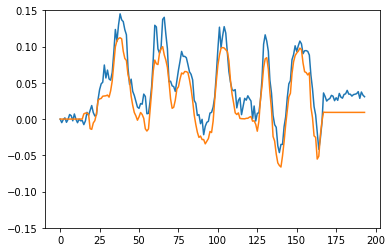

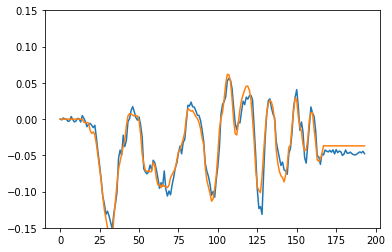

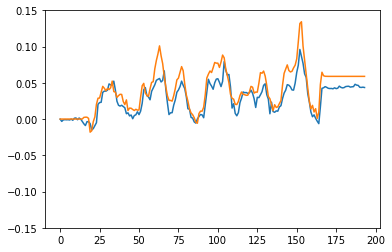

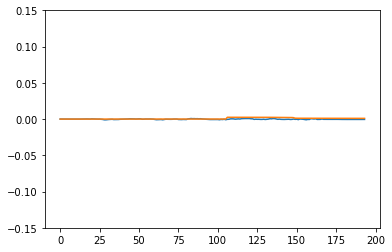

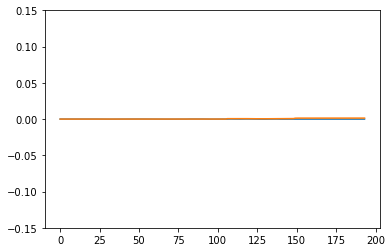

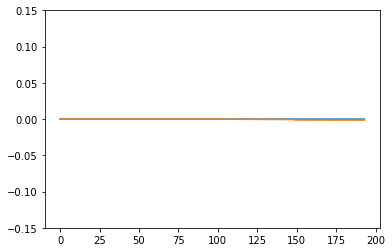

In [41]:
# Another dataset to fit
data = np.load('/home/bacon/catkin_ws/src/cloth_hri/scripts/data_0814-1521.npz')
feat = data['feat']
pos = data['pos']
# Use the model to predict the velocity/direction of end effector
target = 0  # target index  
X = feat[:] - feat[target]
y = pos[:] - pos[target]

X,y = same_size(X,y)

#compute the gradient of the feature vector
y_pred = model.predict(X)



#y_pred = uniform_filter1d(y_pred,30)
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.15,0.15])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(len(y)),y[:,i])
    plt.show()